<a href="https://colab.research.google.com/github/sartoriando/dotfiles/blob/master/Rascunho_trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import requests


Que dados quero obter?

Gênero na Câmara dos Deputados

Evolução no tempo
  - Desde quando? 1988
  - Descobrir que legislatura foi essa em df_legislaturas
  - em df_deputados, filtrar pela idLegislaturaInicial com dados acima

Perfil:
  - Idade
  - Estados - como obter isso, a UF pela qual foi eleita?
  - Partidos?

São autoras/co-autoras de quais projetos/ por temas?

Em que frentes parlamentares se conentram?

Presença na Mesa diretora
  Explicar importância disso


In [4]:
# Links das bases de dados
url_deputados = 'https://dadosabertos.camara.leg.br/arquivos/deputados/xlsx/deputados.xlsx'

# Formando o dataframe com os dados de todas as legislaturas (período para o qual o deputado é eleito)
# Importação da base de dados sobre as legislaturas. 
# está disponível em: curl -X GET "curl -X GET "https://dadosabertos.camara.leg.br/api/v2/legislaturas?itens=56&ordem=ASC&ordenarPor=id" -H "accept: application/json""
# com as dificuldades para ler como json no colab, colei os dados formando um dicionário 
dic_legislaturas = {"id":1,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/1","dataInicio":"1826-04-29","dataFim":"1830-04-24"},{"id":2,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/2","dataInicio":"1830-04-25","dataFim":"1834-04-24"},{"id":3,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/3","dataInicio":"1834-04-25","dataFim":"1838-04-24"},{"id":4,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/4","dataInicio":"1838-04-25","dataFim":"1842-04-24"},{"id":5,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/5","dataInicio":"1842-04-25","dataFim":"1844-05-24"},{"id":6,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/6","dataInicio":"1844-12-24","dataFim":"1848-04-24"},{"id":7,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/7","dataInicio":"1848-04-25","dataFim":"1849-02-19"},{"id":8,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/8","dataInicio":"1849-12-15","dataFim":"1853-04-14"},{"id":9,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/9","dataInicio":"1853-04-15","dataFim":"1857-04-14"},{"id":10,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/10","dataInicio":"1857-04-15","dataFim":"1861-04-14"},{"id":11,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/11","dataInicio":"1861-04-15","dataFim":"1863-05-12"},{"id":12,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/12","dataInicio":"1863-12-14","dataFim":"1867-04-14"},{"id":13,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/13","dataInicio":"1867-04-15","dataFim":"1868-07-18"},{"id":14,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/14","dataInicio":"1869-04-15","dataFim":"1872-05-22"},{"id":15,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/15","dataInicio":"1872-11-13","dataFim":"1876-11-12"},{"id":16,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/16","dataInicio":"1876-12-13","dataFim":"1878-04-11"},{"id":17,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/17","dataInicio":"1878-11-27","dataFim":"1881-06-30"},{"id":18,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/18","dataInicio":"1881-12-13","dataFim":"1884-09-03"},{"id":19,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/19","dataInicio":"1885-02-11","dataFim":"1885-09-26"},{"id":20,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/20","dataInicio":"1886-04-15","dataFim":"1889-06-15"},{"id":21,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/21","dataInicio":"1889-11-02","dataFim":"1889-11-15"},{"id":22,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/22","dataInicio":"1891-06-10","dataFim":"1894-04-17"},{"id":23,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/23","dataInicio":"1894-04-18","dataFim":"1897-04-17"},{"id":24,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/24","dataInicio":"1897-04-18","dataFim":"1900-04-17"},{"id":25,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/25","dataInicio":"1900-04-18","dataFim":"1903-04-17"},{"id":26,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/26","dataInicio":"1903-04-18","dataFim":"1906-04-17"},{"id":27,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/27","dataInicio":"1906-04-18","dataFim":"1909-04-17"},{"id":28,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/28","dataInicio":"1909-04-18","dataFim":"1912-04-17"},{"id":29,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/29","dataInicio":"1912-04-18","dataFim":"1915-04-02"},{"id":30,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/30","dataInicio":"1915-04-03","dataFim":"1918-04-17"},{"id":31,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/31","dataInicio":"1918-04-18","dataFim":"1921-04-14"},{"id":32,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/32","dataInicio":"1921-04-15","dataFim":"1924-04-14"},{"id":33,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/33","dataInicio":"1924-04-15","dataFim":"1927-04-14"},{"id":34,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/34","dataInicio":"1927-04-15","dataFim":"1930-04-14"},{"id":35,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/35","dataInicio":"1930-04-15","dataFim":"1930-11-11"},{"id":36,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/36","dataInicio":"1934-07-21","dataFim":"1935-04-27"},{"id":37,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/37","dataInicio":"1935-04-28","dataFim":"1937-11-10"},{"id":38,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/38","dataInicio":"1946-09-23","dataFim":"1951-03-09"},{"id":39,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/39","dataInicio":"1951-03-10","dataFim":"1955-01-31"},{"id":40,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/40","dataInicio":"1955-02-01","dataFim":"1959-01-31"},{"id":41,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/41","dataInicio":"1959-02-01","dataFim":"1963-01-31"},{"id":42,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/42","dataInicio":"1963-02-01","dataFim":"1967-01-31"},{"id":43,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/43","dataInicio":"1967-02-01","dataFim":"1971-01-31"},{"id":44,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/44","dataInicio":"1971-02-01","dataFim":"1975-01-31"},{"id":45,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/45","dataInicio":"1975-02-01","dataFim":"1979-01-31"},{"id":46,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/46","dataInicio":"1979-02-01","dataFim":"1983-01-31"},{"id":47,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/47","dataInicio":"1983-02-01","dataFim":"1987-01-31"},{"id":48,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/48","dataInicio":"1987-02-01","dataFim":"1991-01-31"},{"id":49,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/49","dataInicio":"1991-02-01","dataFim":"1995-01-31"},{"id":50,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/50","dataInicio":"1995-02-01","dataFim":"1999-01-31"},{"id":51,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/51","dataInicio":"1999-02-01","dataFim":"2003-01-31"},{"id":52,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/52","dataInicio":"2003-02-01","dataFim":"2007-01-31"},{"id":53,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/53","dataInicio":"2007-02-01","dataFim":"2011-01-31"},{"id":54,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/54","dataInicio":"2011-02-01","dataFim":"2015-01-31"},{"id":55,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/55","dataInicio":"2015-02-01","dataFim":"2019-01-31"},{"id":56,"uri":"https://dadosabertos.camara.leg.br/api/v2/legislaturas/56","dataInicio":"2019-02-01","dataFim":"2023-01-31"}


In [5]:
#  Formando os Dataframes

# Formando o dataframe com os dados de todos os deputados
df_deputados = pd.read_excel(url_deputados)

# Base de dados das legislaturas
df_legislaturas = pd.DataFrame(dic_legislaturas)

#  Df com informações exclusivas das deputadas
m = df_deputados[df_deputados.siglaSexo == 'F']
mulheres = m[['nome','dataNascimento', 'idLegislaturaInicial', 'uri','nomeCivil', 'cpf', 'urlRedeSocial', 'urlWebsite', 'ufNascimento', 'municipioNascimento']]



In [6]:
# DF com totais de deputadas por legislatura

totais_por_sexo = df_deputados.groupby(['idLegislaturaInicial', 'siglaSexo']).count().reset_index()
totais_por_sexo.tail(5)


,idLegislaturaInicial,siglaSexo,uri,nome,idLegislaturaFinal,nomeCivil,cpf,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento
68,54,M,243,243,243,243,0,46,14,243,6,240,239
69,55,F,38,38,38,38,0,7,4,38,0,38,38
70,55,M,212,212,212,212,0,32,7,212,2,212,212
71,56,F,48,48,48,48,0,20,6,48,0,48,48
72,56,M,225,225,225,225,0,91,12,225,2,224,225


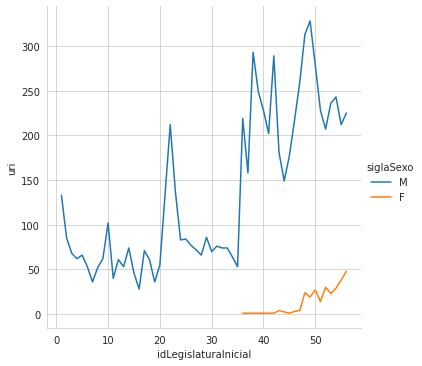

In [7]:
sns.set_style('whitegrid')
sns.relplot(data=totais_por_sexo, kind='line', x='idLegislaturaInicial', y='uri', hue='siglaSexo')


In [8]:
df_deputados.tail(2)
df_deputados[df_deputados['nome'] == 'Rachel Marques'].uri.values

array(['https://dadosabertos.camara.leg.br/api/v2/deputados/215361'],
      dtype=object)

In [9]:
# Busca a legislatura da primeira mulher eleita para definir nova df
mulheres.idLegislaturaInicial.min()
# Df com dados de deputaods desde a 36a legislatura, quando foi eleita a primeira mulher. 
mulheres.idLegislaturaInicial.min()
df_deps_reduzida = df_deputados[df_deputados.idLegislaturaInicial >=36]
df_deps_reduzida.head()

,uri,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento
1187,https://dadosabertos.camara.leg.br/api/v2/depu...,MÁRIO LIMA,42,48,MÁRIO SOARES LIMA,NaN,M,NaN,NaN,1935-02-19,2009-07-10,BA,Glória
1188,https://dadosabertos.camara.leg.br/api/v2/depu...,MAURÍCIO FRUET,46,48,Maurício Roslindo Fruet,NaN,M,NaN,NaN,1939-08-12,1998-08-30,PR,Curitiba
1189,https://dadosabertos.camara.leg.br/api/v2/depu...,OSWALDO ALMEIDA,48,48,Oswaldo Barreto de Almeida,NaN,M,NaN,NaN,1933-10-22,NaN,RJ,NaN
1190,https://dadosabertos.camara.leg.br/api/v2/depu...,OSWALDO LIMA FILHO,40,48,Oswaldo Cavalcanti da Costa Lima Filho,NaN,M,NaN,NaN,1921-04-26,1994-11-11,PE,NaN
1191,https://dadosabertos.camara.leg.br/api/v2/depu...,TITO COSTA,48,48,Antonio Tito Costa,NaN,M,NaN,NaN,1922-12-31,NaN,SP,Torrinha


In [10]:
df_teste = df_deputados[df_deputados.idLegislaturaInicial ==36]
df_teste.head()

,uri,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento
1255,https://dadosabertos.camara.leg.br/api/v2/depu...,CARLOTA DE QUEIRÓS,36,37,Carlota Pereira de Queirós,NaN,F,NaN,NaN,1892-02-13,1982-04-17,SP,São Paulo
1458,https://dadosabertos.camara.leg.br/api/v2/depu...,SIMÃO DA CUNHA,36,37,Simão da Cunha Pereira,NaN,M,NaN,NaN,1883-05-02,1963-01-01,MG,Peçanha
2009,https://dadosabertos.camara.leg.br/api/v2/depu...,GÓES MONTEIRO,36,36,Manoel Cesar de Góes Monteiro,NaN,M,NaN,NaN,1891-06-22,1963-08-21,AL,NaN
2010,https://dadosabertos.camara.leg.br/api/v2/depu...,IZIDRO DE VASCONCELOS,36,37,Izidro Teixeira de Vasconcellos,NaN,M,NaN,NaN,1886-06-04,1941-03-01,AL,Viçosa
2011,https://dadosabertos.camara.leg.br/api/v2/depu...,VALENTE DE LIMA,36,37,José Affonso Valente de Lima,NaN,M,NaN,NaN,NaN,1958-01-01,AL,Marechal Deodoro


In [11]:
#  Criando df com dados pessoais dos deputados desde a 36a legislatura(quando foi eleita a 1a mulher)
# Criando um Dataframe vazio:
df_dados_pessoais = pd.DataFrame({'A' : []})

# Criando serie com os url dos dados pessoais de cada dep. Uri é a chave universal
serie_uri = df_deps_reduzida.uri
# serie_uri = df_teste.uri


In [16]:
# Scrapping na API da Câmara dos Deputados, abrindo o json de cada deputado para obter mais dados. 

for url in serie_uri:
  headers = {'content-type': 'application/json', 'Accept-Charset': 'UTF-8'}
  r = requests.get(url, headers=headers)
  r.json()
  j = r.json()
  # cria df a partir do json
  df = pd.json_normalize(j)
  df_dados_pessoais = df_dados_pessoais.append(df,ignore_index=True)
# df_dados_pessoais = pd.concat([df_dados_pessoais, df])

#  Renomeando colunas, retirando o dados e o id antes dos nomes.
for i in range(len(df_dados_pessoais.keys())):
  a = df_dados_pessoais.keys()[i]
  old = str(a)
  new = str(a.split('.')[-1])
  df_dados_pessoais.rename(columns={old:new}, inplace=True)

df_dados_pessoais.head()



,A,links,dados.id,dados.uri,dados.nomeCivil,dados.ultimoStatus.id,dados.ultimoStatus.uri,dados.ultimoStatus.nome,dados.ultimoStatus.siglaPartido,dados.ultimoStatus.uriPartido,dados.ultimoStatus.siglaUf,dados.ultimoStatus.idLegislatura,dados.ultimoStatus.urlFoto,dados.ultimoStatus.email,dados.ultimoStatus.data,dados.ultimoStatus.nomeEleitoral,dados.ultimoStatus.gabinete.nome,dados.ultimoStatus.gabinete.predio,dados.ultimoStatus.gabinete.sala,dados.ultimoStatus.gabinete.andar,dados.ultimoStatus.gabinete.telefone,dados.ultimoStatus.gabinete.email,dados.ultimoStatus.situacao,dados.ultimoStatus.condicaoEleitoral,dados.ultimoStatus.descricaoStatus,dados.cpf,dados.sexo,dados.urlWebsite,dados.redeSocial,dados.dataNascimento,dados.dataFalecimento,dados.ufNascimento,dados.municipioNascimento,dados.escolaridade
0,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",1573.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Carlota Pereira de Queirós,1573.0,https://dadosabertos.camara.leg.br/api/v2/depu...,CARLOTA DE QUEIRÓS,PC,https://dadosabertos.camara.leg.br/api/v2/part...,SP,37.0,https://www.camara.leg.br/internet/deputado/ba...,None,None,CARLOTA DE QUEIRÓS,None,None,None,None,None,None,Vacância,Titular,None,None,F,None,[],1892-02-13,None,SP,São Paulo,Superior
1,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",1864.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Simão da Cunha Pereira,1864.0,https://dadosabertos.camara.leg.br/api/v2/depu...,SIMÃO DA CUNHA,PP**,https://dadosabertos.camara.leg.br/api/v2/part...,MG,37.0,https://www.camara.leg.br/internet/deputado/ba...,None,None,SIMÃO DA CUNHA,None,None,None,None,None,None,Vacância,Titular,None,None,M,None,[],1883-05-02,None,MG,Peçanha,Superior
2,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",2684.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Manoel Cesar de Góes Monteiro,2684.0,https://dadosabertos.camara.leg.br/api/v2/depu...,GÓES MONTEIRO,None,None,AL,36.0,https://www.camara.leg.br/internet/deputado/ba...,None,None,GÓES MONTEIRO,None,None,None,None,None,None,Vacância,Titular,None,None,M,None,[],1891-06-22,None,AL,None,Superior
3,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",2686.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Izidro Teixeira de Vasconcellos,2686.0,https://dadosabertos.camara.leg.br/api/v2/depu...,IZIDRO DE VASCONCELOS,None,None,AL,37.0,https://www.camara.leg.br/internet/deputado/ba...,None,None,IZIDRO DE VASCONCELOS,None,None,None,None,None,None,Vacância,Titular,None,None,M,None,[],1886-06-04,None,AL,Viçosa,Superior
4,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",2688.0,https://dadosabertos.camara.leg.br/api/v2/depu...,José Affonso Valente de Lima,2688.0,https://dadosabertos.camara.leg.br/api/v2/depu...,VALENTE DE LIMA,PNA,https://dadosabertos.camara.leg.br/api/v2/part...,AL,37.0,https://www.camara.leg.br/internet/deputado/ba...,None,None,VALENTE DE LIMA,None,None,None,None,None,None,Vacância,Titular,None,None,M,None,[],None,None,AL,Marechal Deodoro,Superior


In [17]:
df_dados_pessoais

,A,links,dados.id,dados.uri,dados.nomeCivil,dados.ultimoStatus.id,dados.ultimoStatus.uri,dados.ultimoStatus.nome,dados.ultimoStatus.siglaPartido,dados.ultimoStatus.uriPartido,dados.ultimoStatus.siglaUf,dados.ultimoStatus.idLegislatura,dados.ultimoStatus.urlFoto,dados.ultimoStatus.email,dados.ultimoStatus.data,dados.ultimoStatus.nomeEleitoral,dados.ultimoStatus.gabinete.nome,dados.ultimoStatus.gabinete.predio,dados.ultimoStatus.gabinete.sala,dados.ultimoStatus.gabinete.andar,dados.ultimoStatus.gabinete.telefone,dados.ultimoStatus.gabinete.email,dados.ultimoStatus.situacao,dados.ultimoStatus.condicaoEleitoral,dados.ultimoStatus.descricaoStatus,dados.cpf,dados.sexo,dados.urlWebsite,dados.redeSocial,dados.dataNascimento,dados.dataFalecimento,dados.ufNascimento,dados.municipioNascimento,dados.escolaridade
0,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",1573.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Carlota Pereira de Queirós,1573.0,https://dadosabertos.camara.leg.br/api/v2/depu...,CARLOTA DE QUEIRÓS,PC,https://dadosabertos.camara.leg.br/api/v2/part...,SP,37.0,https://www.camara.leg.br/internet/deputado/ba...,None,None,CARLOTA DE QUEIRÓS,None,None,None,None,None,None,Vacância,Titular,None,None,F,None,[],1892-02-13,None,SP,São Paulo,Superior
1,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",1864.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Simão da Cunha Pereira,1864.0,https://dadosabertos.camara.leg.br/api/v2/depu...,SIMÃO DA CUNHA,PP**,https://dadosabertos.camara.leg.br/api/v2/part...,MG,37.0,https://www.camara.leg.br/internet/deputado/ba...,None,None,SIMÃO DA CUNHA,None,None,None,None,None,None,Vacância,Titular,None,None,M,None,[],1883-05-02,None,MG,Peçanha,Superior
2,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",2684.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Manoel Cesar de Góes Monteiro,2684.0,https://dadosabertos.camara.leg.br/api/v2/depu...,GÓES MONTEIRO,None,None,AL,36.0,https://www.camara.leg.br/internet/deputado/ba...,None,None,GÓES MONTEIRO,None,None,None,None,None,None,Vacância,Titular,None,None,M,None,[],1891-06-22,None,AL,None,Superior
3,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",2686.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Izidro Teixeira de Vasconcellos,2686.0,https://dadosabertos.camara.leg.br/api/v2/depu...,IZIDRO DE VASCONCELOS,None,None,AL,37.0,https://www.camara.leg.br/internet/deputado/ba...,None,None,IZIDRO DE VASCONCELOS,None,None,None,None,None,None,Vacância,Titular,None,None,M,None,[],1886-06-04,None,AL,Viçosa,Superior
4,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",2688.0,https://dadosabertos.camara.leg.br/api/v2/depu...,José Affonso Valente de Lima,2688.0,https://dadosabertos.camara.leg.br/api/v2/depu...,VALENTE DE LIMA,PNA,https://dadosabertos.camara.leg.br/api/v2/part...,AL,37.0,https://www.camara.leg.br/internet/deputado/ba...,None,None,VALENTE DE LIMA,None,None,None,None,None,None,Vacância,Titular,None,None,M,None,[],None,None,AL,Marechal Deodoro,Superior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",131159.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Alfredo de Arruda Camara,131159.0,https://dadosabertos.camara.leg.br/api/v2/depu...,ARRUDA CÂMARA,ARENA,https://dadosabertos.camara.leg.br/api/v2/part...,PE,43.0,https://www.camara.leg.br/internet/deputado/ba...,None,None,ARRUDA CÂMARA,None,None,None,None,None,None,Vacância,Titular,None,None,M,None,[],1905-12-08,None,PE,Afogados da Ingazeira,Superior
216,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",131444.0,https://dadosabertos.camara.leg.br/api/v2/depu...,José Maria Alkmim,131444.0,https://dadosabertos.camara.leg.br/api/v2/depu...,JOSÉ MARIA ALKMIM,ARENA,https://dadosabertos.camara.leg.br/api/v2/part...,MG,44.0,https://www.camara.leg.br/internet/deputado/ba...,None,None,JOSÉ MARIA ALKMIM,None,None

In [ ]:
df_idades = df_deputados.merge(df_legislaturas, left_on='idLegislaturaInicial', right_on='id')
df_idades.rename(columns={"uri_x": "uri_deputado", "uri_y": "uri_legislatura"}, inplace=True)

df_idades.tail(5)


,uri_deputado,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento,id,uri_legislatura,dataInicio,dataFim
7628,https://dadosabertos.camara.leg.br/api/v2/depu...,JUQUINHA,51,51,JOSÉ FRANCISCO DAS NEVES,NaN,M,NaN,NaN,1947-01-29,NaN,GO,Goiânia,51,https://dadosabertos.camara.leg.br/api/v2/legi...,1999-02-01,2003-01-31
7629,https://dadosabertos.camara.leg.br/api/v2/depu...,LUIZ BITTENCOURT,51,53,LUIZ JOSÉ BITTENCOURT,NaN,M,NaN,NaN,1956-06-20,NaN,GO,Goiânia,51,https://dadosabertos.camara.leg.br/api/v2/legi...,1999-02-01,2003-01-31
7630,https://dadosabertos.camara.leg.br/api/v2/depu...,NORBERTO TEIXEIRA,51,51,NORBERTO JOSE TEIXEIRA,NaN,M,NaN,NaN,1954-08-09,NaN,RN,São Pedro,51,https://dadosabertos.camara.leg.br/api/v2/legi...,1999-02-01,2003-01-31
7631,https://dadosabertos.camara.leg.br/api/v2/depu...,PEDRO CHAVES,51,55,PEDRO PINHEIRO CHAVES,NaN,M,NaN,NaN,1958-08-28,NaN,GO,São Domingos,51,https://dadosabertos.camara.leg.br/api/v2/legi...,1999-02-01,2003-01-31
7632,https://dadosabertos.camara.leg.br/api/v2/depu...,BEN-HUR FERREIRA,51,51,EURÍDIO BEN-HUR FERREIRA,NaN,M,NaN,NaN,1964-01-11,NaN,MS,Campo Grande,51,https://dadosabertos.camara.leg.br/api/v2/legi...,1999-02-01,2003-01-31


In [ ]:
# Testando cálculos para a idade em df_idades   CONTINUAR DAQUI ====================================

def teste(inicio_legis, data_nascimento):
  # return type(inicio_legis) .> retorna class str
  novo_inicio = datetime.strptime(inicio_legis,'%Y-%m-%d')
  # return novo_inicio >> beleza
  # return type(data_nascimento) >> class stri
  novo_nascimento = datetime.strptime(data_nascimento, '%Y-%m-%d')
  # return novo_nascimento
  # return novo_inicio - novo_nascimento



df_idades['idadeNaPosse'] = df_idades.apply(lambda x: teste(x.dataInicio, x.dataNascimento), axis=1)
# (lambda x: x.dataInicio - x.dataNascimento, axis=1)
#  (lambda x: x[0] + x[1], axis=1)
# lambda row: row['dataInicio'] - row['dataNascimento'])
df_idades.tail(2)

# str1 = '2010-11-10'
# change_date = lambda x: datetime.strptime(str1,'%Y-%m-%d')
# change_date(str1)


# new_col = mulheres.dataNascimento.values.apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
                                        # datetime.strptime(x,'%Y-%m-%d'))    lambda x: len(x) da series
# nascimento_array = mulheres.dataNascimento.values    #array numpy
# teste_array = mulheres.dataNascimento.apply(lambda x: x + 1)
# teste_array
# type(new_col)

# date_test = np.datetime64('2019-08-26')
# date_test 

# b1 = mulheres
# a = df_legislaturas[df_legislatura.id == b1]

TypeError: ignored

In [ ]:



df_legislaturas.tail(10)

,id,uri,dataInicio,dataFim
46,47,https://dadosabertos.camara.leg.br/api/v2/legi...,1983-02-01,1987-01-31
47,48,https://dadosabertos.camara.leg.br/api/v2/legi...,1987-02-01,1991-01-31
48,49,https://dadosabertos.camara.leg.br/api/v2/legi...,1991-02-01,1995-01-31
49,50,https://dadosabertos.camara.leg.br/api/v2/legi...,1995-02-01,1999-01-31
50,51,https://dadosabertos.camara.leg.br/api/v2/legi...,1999-02-01,2003-01-31
51,52,https://dadosabertos.camara.leg.br/api/v2/legi...,2003-02-01,2007-01-31
52,53,https://dadosabertos.camara.leg.br/api/v2/legi...,2007-02-01,2011-01-31
53,54,https://dadosabertos.camara.leg.br/api/v2/legi...,2011-02-01,2015-01-31
54,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31
55,56,https://dadosabertos.camara.leg.br/api/v2/legi...,2019-02-01,2023-01-31


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Perfil das deputadas:
# idades por legislatura
# UFs por legislatura
# percentual de mulheres por legislatura OK FALTA VER GRÁFICO